## **Machine Learning Lab 7- PCA and LDA**
<hr/>

Submitted by <br>
**Jasleen Kaur Sondhi** <br>

<hr>


## Lab Overview  
### Objectives

In this lab, we will learn how to work with PCA and LDA.

We will do the following-

#### Questions
- Part A. Perform PCA and LDA on Breast Cancer Dataset, write down your obsevations. While loading, use the toy dataset available in SKLearn (load_breast_cancer)

- Part B. Illustrate the effect of changing various method parameters of PCA and LDA. Compare the accuracies, and provide visualizations and interpretations for the evaluation metrices.

- Part C. "PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images". Justify this statement with your own findings.





### References
#### PCA
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://towardsdatascience.com/principal-component-analysis-for-breast-cancer-data-with-r-and-python-b312d28e911f
- https://www.kaggle.com/jahirmorenoa/pca-to-the-breast-cancer-data-set
- https://www.youtube.com/watch?v=e2sM7ccaA9c&ab_channel=DigitalSreeni
- https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
- https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
- https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example
- https://github.com/gtraskas/breast_cancer_prediction/blob/master/breast_cancer.ipynb

#### LDA
- http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://machinelearningmastery.com/linear-discriminant-analysis-with-python/
- https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
- https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/
- https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import xgboost
#import warnings
#warnings.filterwarnings('ignore')
from pprint import pprint as p

In [2]:
cancer = load_breast_cancer(as_frame=1)


In [3]:
cancer_df = pd.DataFrame(cancer.frame)

In [4]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


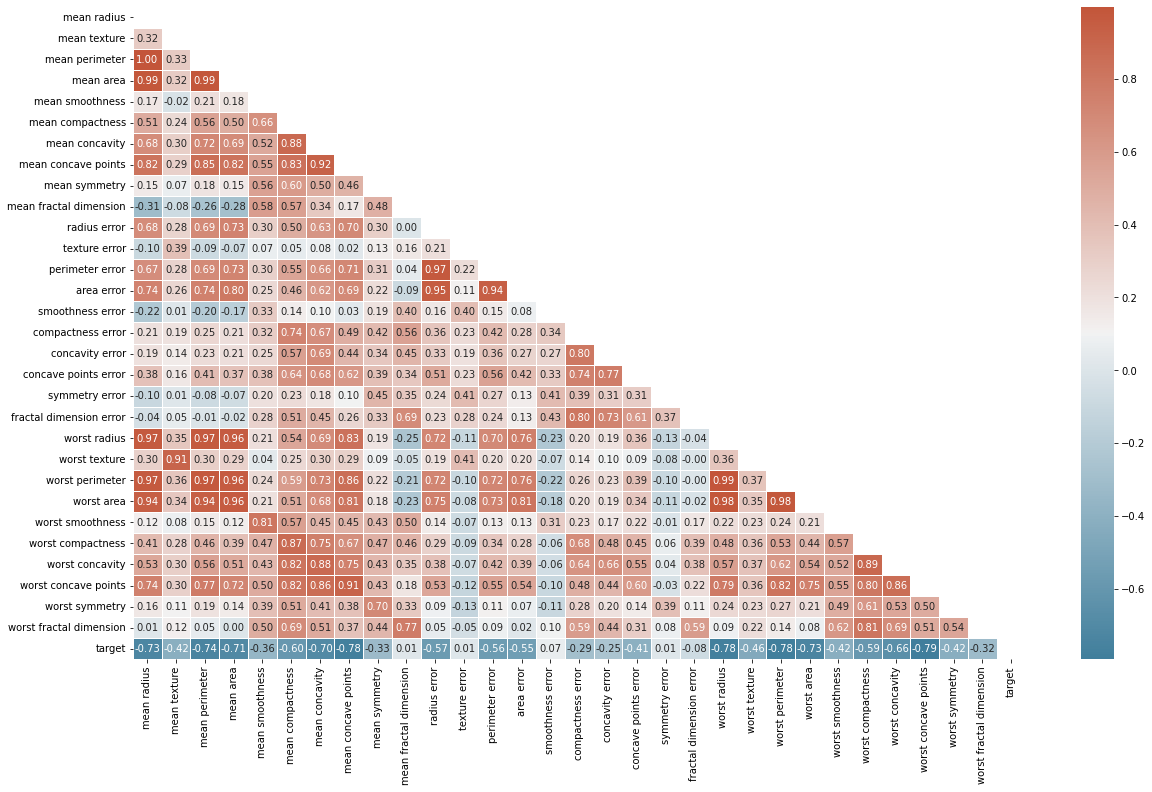

In [8]:
plt.figure(figsize = (20, 12))
corr = cancer_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

In [9]:
X = cancer_df.drop(columns = 'target')

In [10]:
X.shape

(569, 30)

In [11]:
y = pd.DataFrame(cancer_df['target'])

In [12]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<AxesSubplot:>

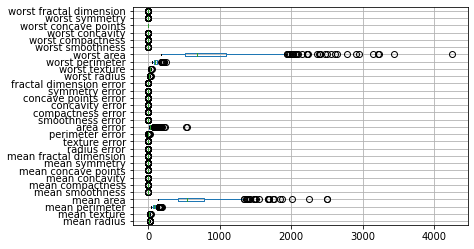

In [13]:
X.boxplot(vert = 0)

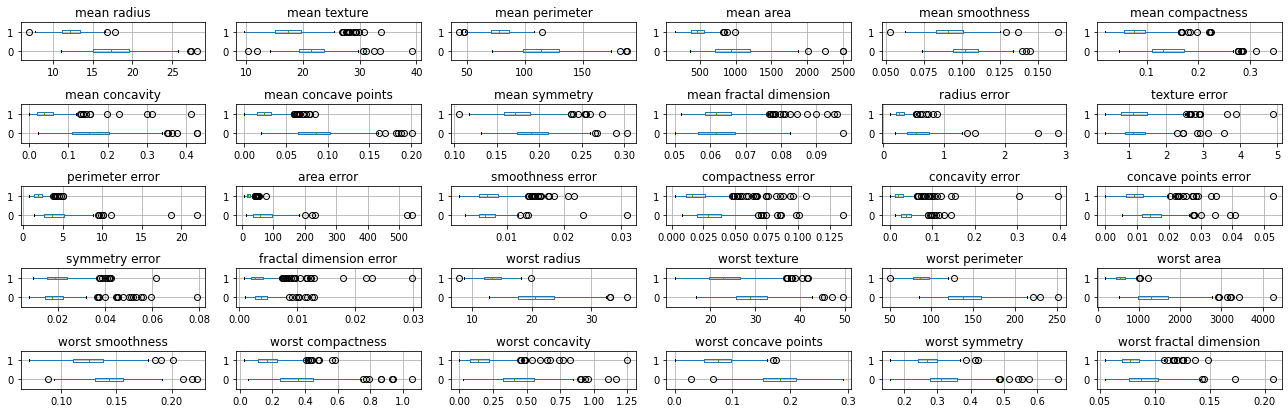

In [14]:
fig, axes = plt.subplots(5, 6, figsize=(18, 6))
for c, ax in zip(X.columns, axes.ravel()):
    cancer_df[[c, 'target']].boxplot(vert=False, by='target', ax=ax)
    ax.set_xlabel("")
plt.suptitle("")
plt.tight_layout()

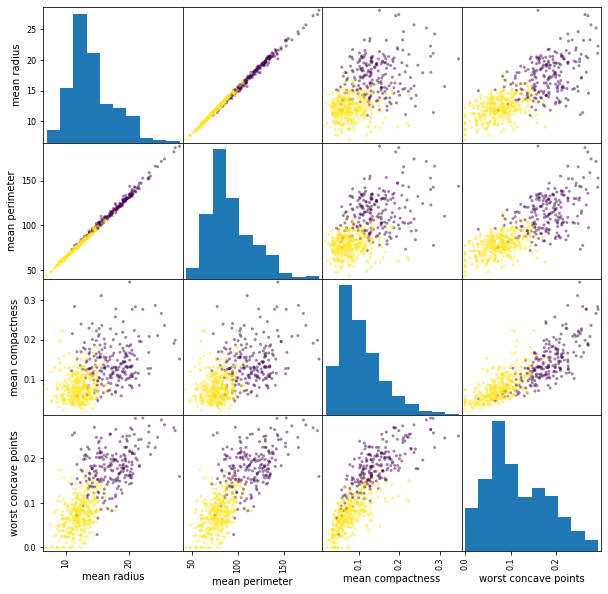

In [15]:
pd.plotting.scatter_matrix(
    X[['mean radius', 'mean perimeter', 'mean compactness', 'worst concave points']],
    c=cancer_df.target, figsize=(10, 10));

<AxesSubplot:xlabel='mean radius', ylabel='mean concave points'>

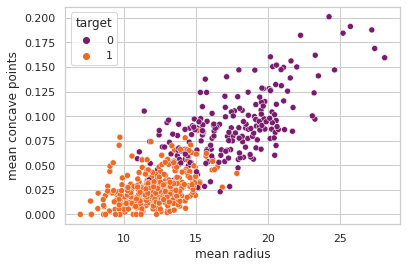

In [16]:
sns.set(style='whitegrid')
sns.scatterplot(x="mean radius",
                    y="mean concave points",hue='target',
                    data=cancer_df, palette="inferno")

In [17]:
corr_matrix = X.corr().abs() 
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
X = X.drop(to_drop, axis = 1)
print(f"The reduced dataframe has {X.shape[1]} columns.")

The reduced dataframe has 20 columns.


In [18]:
X.shape

(569, 20)

In [19]:
sc = StandardScaler()
X_standardise = sc.fit_transform(X)
X_standardise

array([[ 1.56846633e+00,  3.28351467e+00,  2.21751501e+00, ...,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [-8.26962447e-01, -4.87071673e-01,  1.39236330e-03, ...,
         1.08708430e+00, -2.43889668e-01,  2.81189987e-01],
       [ 9.42210440e-01,  1.05292554e+00,  9.39684817e-01, ...,
         1.95500035e+00,  1.15225500e+00,  2.01391209e-01],
       ...,
       [-8.40483881e-01, -3.86796697e-02, -8.09117071e-01, ...,
         4.14068691e-01, -1.10454895e+00, -3.18409158e-01],
       [ 1.52576706e+00,  3.27214378e+00,  2.13719425e+00, ...,
         2.28998549e+00,  1.91908301e+00,  2.21963528e+00],
       [-3.11208479e+00, -1.15075248e+00, -8.20069901e-01, ...,
        -1.74506282e+00, -4.81382136e-02, -7.51206693e-01]])

### **PCA**

In [20]:
pca = PCA(n_components=4)
result = pca.fit(X_standardise)
pca_results = result.transform(X_standardise)
pca_df = pd.DataFrame(data = pca_results)
pca_df

,0,1,2,3
0,7.371777,-1.454434,-1.054312,-0.581842
1,-0.552629,-2.175279,0.913744,0.356532
2,3.262606,-1.857634,0.576157,-0.360870
3,11.435339,2.494598,-5.455442,-1.532930
4,1.013867,-0.258889,1.602642,0.225341
...,...,...,...,...
564,1.645574,-1.673853,3.178846,-0.639907
565,0.159357,-1.374720,3.081404,-1.570707
566,-0.209246,-1.116965,1.839553,1.334608
567,8.137511,-2.067645,-0.375820,-0.191313


In [21]:
feature_importance = pd.DataFrame(pca.components_.T, index=X.columns)
feature_importance

,0,1,2,3
mean smoothness,0.231749,0.029707,-0.226315,-0.301459
mean compactness,0.323850,-0.074074,0.003800,0.004591
mean symmetry,0.229474,0.061742,-0.140773,-0.300389
mean fractal dimension,0.221905,0.305740,-0.262968,0.075218
texture error,0.043104,0.267381,0.285782,-0.351113
area error,0.146408,-0.210215,0.393022,-0.246915
smoothness error,0.086964,0.377203,0.078383,-0.268353
compactness error,0.279191,0.175674,0.184663,0.226843
concavity error,0.244608,0.157831,0.246818,0.273336
concave points error,0.246660,0.101105,0.314206,0.085732


In [22]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

75.29039812584999

In [23]:
variance_ratios = pd.DataFrame(pca.explained_variance_ratio_.reshape(1,4), index=['Explained Variance Ratio'])
variance_ratios

,0,1,2,3
Explained Variance Ratio,0.417505,0.15068,0.108806,0.075913


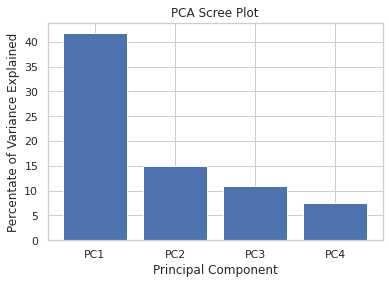

In [24]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

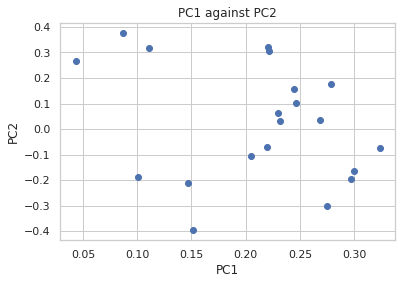

In [25]:
plt.scatter(feature_importance[0], feature_importance[1])
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(111.49999999999999, 0.5, 'Features')

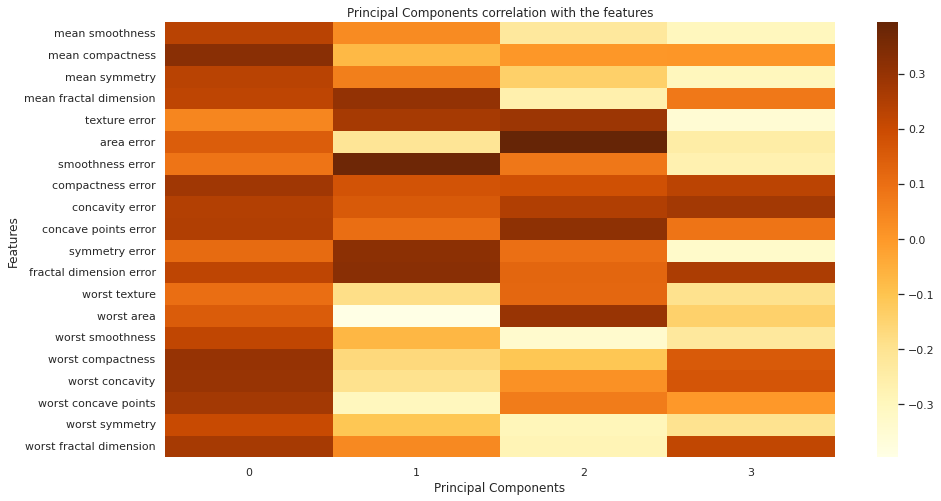

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(feature_importance,cmap="YlOrBr")
plt.title('Principal Components correlation with the features')
plt.xlabel('Principal Components')
plt.ylabel('Features')

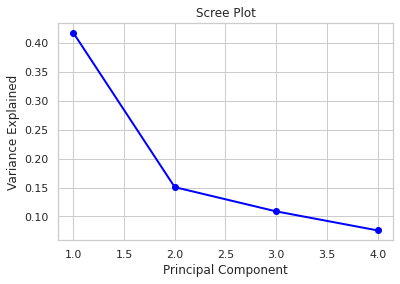

In [27]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9370629370629371


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
model1 = DecisionTreeClassifier()

In [32]:
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.916083916083916


In [33]:
def model_build(data):
    X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.25,random_state=123)
    model2 = xgboost.XGBClassifier()
    model2.fit(X_train,y_train)
    y_cap = model2.predict(X_test)
    print(f"Accuracy score :- {accuracy_score(y_test,y_cap)}")

In [34]:
model_build(pca_df)

Accuracy score :- 0.986013986013986


In [35]:
model_build(X_standardise)

Accuracy score :- 0.9790209790209791


In [36]:
model_build(X)

Accuracy score :- 0.9790209790209791


### **LDA**

In [37]:
def lda_model(data,solver='svd',shrinkage=None):
    X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.25)
    lda = LDA(n_components=1,solver=solver,shrinkage=shrinkage)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    #model = xgboost.XGBClassifier()
    model1.fit(X_train,y_train)
    y_cap = model1.predict(X_test)
    print("*"*30)
    print(f"LDA with {solver} :- ")
    print(f"Accuracy score :- {accuracy_score(y_test,y_cap)}")
    print(f"{classification_report(y_test,y_cap)}")
    #return accuracy_score(y_test,y_cap)
lda_model(X_standardise)

******************************
LDA with svd :- 
Accuracy score :- 0.9300699300699301
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.96      0.93      0.94        91

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Changing the different parameters in PCA and LDA

In [38]:
def all_mode_model(mode, n=1, solver='svd',shrinkage=None):
    if mode == 'LDA':
        lda = LDA(n_components=1,solver=solver,shrinkage=shrinkage)
        lda.fit(X_standardise,y)
        model_test= pd.DataFrame(lda.transform(X_standardise))
    elif mode == "PCA":
        pca = PCA(n_components=n)
        result = pca.fit(X_standardise)
        pca_results = result.transform(X_standardise)
        model_test = pd.DataFrame(data = pca_results)
    elif mode == "X":
        model_test = X
    elif mode == "X_standardise":
        model_test = X_standardise
    X_train,X_test,y_train,y_test = train_test_split(model_test,y,test_size=0.25,random_state=123)
    model.fit(X_train,y_train)
    y_cap = model.predict(X_test)
    return accuracy_score(y_test,y_cap),classification_report(y_test,y_cap), pd.DataFrame(confusion_matrix(y_cap,y_test))        

In [39]:
for i in ['PCA','X_standardise','X','LDA']:
    if(i == 'PCA'):
        for k in range(1,6):
            print(f"Mode: {i}, PCA Components:- {k} Accuracy :- ")
            l,p,cm = all_mode_model(i,k)
            print(l*100,'%')
            print()
            print(f"Mode: {i}, PCA Components:- {k} Confusion Matrix :- ")
            print(cm)
            print()
            print(f"Mode: {i}, PCA Components:- {k} Evalution Metrics :- ")
            print(p)
            print("*"*20)
            print()
    elif(i == 'X_standardise'):
        print(f"Mode: {i}, Accuracy score :- ")
        l,p,cm = all_mode_model(i)
        print(l*100,'%')
        print()
        print(f"Mode: {i}, Confusion Matrix :- ")
        print(cm)
        print()
        print(f"Mode: {i}, Evalution Metrics:- ")
        print(p)
        print("*"*20)
        print()
    elif(i == 'X'):
        print(f"Mode: {i}, Accuracy score :- ")
        l,p,cm = all_mode_model(i)
        print(l*100,'%')
        print()
        print(f"Mode: {i}, Confusion Matrix :- ")
        print(cm)
        print()
        print(f"Mode: {i}, Evalution Metrics:- ")
        print(p)
        print("*"*20)
        print()
    elif(i == 'LDA'):
        for o in ['svd','eigen']:
            print(f"Mode: {i}, and solver {o} Accuracy score :- ")
            l,p, cm = all_mode_model(i,1,o)
            print(l*100,'%')
            print()
            print(f"Mode: {i}, and solver {o} Accuracy score :- ")
            print(cm)
            print()
            print(f"Mode: {i}, and solver {o} Evalution Metrics:- ")
            print(p)
            print("*"*20)
            print()
              

Mode: PCA, PCA Components:- 1 Accuracy :- 
84.61538461538461 %

Mode: PCA, PCA Components:- 1 Confusion Matrix :- 
    0   1
0  38   6
1  16  83

Mode: PCA, PCA Components:- 1 Evalution Metrics :- 
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        54
           1       0.84      0.93      0.88        89

    accuracy                           0.85       143
   macro avg       0.85      0.82      0.83       143
weighted avg       0.85      0.85      0.84       143

********************

Mode: PCA, PCA Components:- 2 Accuracy :- 
94.4055944055944 %

Mode: PCA, PCA Components:- 2 Confusion Matrix :- 
    0   1
0  48   2
1   6  87

Mode: PCA, PCA Components:- 2 Evalution Metrics :- 
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.94      0.98      0.96        89

    accuracy                           0.94       143
   macro avg       0.95      0.93     

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

97.9020979020979 %

Mode: PCA, PCA Components:- 4 Confusion Matrix :- 
    0   1
0  52   1
1   2  88

Mode: PCA, PCA Components:- 4 Evalution Metrics :- 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

********************

Mode: PCA, PCA Components:- 5 Accuracy :- 
97.9020979020979 %

Mode: PCA, PCA Components:- 5 Confusion Matrix :- 
    0   1
0  52   1
1   2  88

Mode: PCA, PCA Components:- 5 Evalution Metrics :- 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98     

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

    0   1
0  53   0
1   1  89

Mode: LDA, and solver svd Evalution Metrics:- 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

********************

Mode: LDA, and solver eigen Accuracy score :- 
99.3006993006993 %

Mode: LDA, and solver eigen Accuracy score :- 
    0   1
0  53   0
1   1  89

Mode: LDA, and solver eigen Evalution Metrics:- 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

********************



### "PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images". Justify this statement with your own findings.

Using PCA for image compression
An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.
The basic steps we'll follow:

Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). This is lossy compression, as we are discarding some of the information.
To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
We'll see how good the reconstructed images are for different number of selecte components.

Performing PCA on the image
- We'll perform PCA on the matrix with all the components
- We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture
- We'll pick a suitable number of components to represent the image for compression